In [ ]:
%matplotlib inline

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import to_categorical

In [ ]:
#download mnist data and split into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


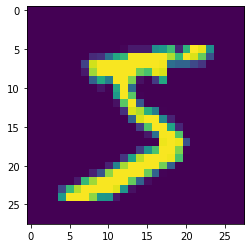

In [ ]:
#plot the first image in the dataset
plt.imshow(X_train[0])

In [ ]:
#check image shape
X_train[0].shape

(28, 28)

In [ ]:
#reshape data to fit model
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [ ]:
#one-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
#create model
model = Sequential()

#add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [ ]:
#compile model using accuracy as a measure of model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#train model
model.fit(X_train, y_train,validation_data=(X_test, y_test), epochs=3)

Epoch 1/3
1875/1875 [==============================] - 22s 5ms/step - loss: 0.2523 - accuracy: 0.9493 - val_loss: 0.1097 - val_accuracy: 0.9664
Epoch 2/3
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0707 - accuracy: 0.9785 - val_loss: 0.0806 - val_accuracy: 0.9749
Epoch 3/3
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0516 - accuracy: 0.9840 - val_loss: 0.0825 - val_accuracy: 0.9777


In [ ]:
#show predictions for the first 3 images in the test set
model.predict(X_test[:4])

1/1 [==============================] - 0s 131ms/step


array([[1.9371041e-10, 1.6897662e-13, 6.9049491e-09, 3.5707123e-07,
        1.0520332e-13, 3.7694401e-12, 4.3996355e-14, 9.9999964e-01,
        6.1063883e-11, 3.5619505e-09],
       [5.1613565e-06, 9.0411453e-07, 9.9980885e-01, 2.2498343e-09,
        2.0616943e-10, 5.7290229e-13, 1.8495545e-04, 7.9943711e-17,
        9.6873777e-08, 4.1580567e-16],
       [5.9843691e-10, 9.9999058e-01, 2.1182905e-06, 4.9861708e-12,
        3.4814616e-07, 6.4032929e-06, 4.5789122e-08, 3.4030294e-09,
        4.5434365e-07, 1.9591682e-11],
       [9.9999869e-01, 3.3297471e-12, 1.0176854e-08, 9.4835771e-12,
        2.4452658e-12, 5.7613171e-11, 1.2982141e-06, 3.3511677e-12,
        1.1537650e-08, 3.5105540e-08]], dtype=float32)

In [ ]:
#show actual results for the first 3 images in the test set
y_test[:4]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)